In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import gc

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
new_train_data = pd.concat([train_data, test_data])

In [9]:
new_train_data.shape

(1309, 12)

In [11]:
new_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
new_train_data = new_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [17]:
new_train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,NaN,0,0,8.0500,S
414,1306,NaN,1,female,39.0,0,0,108.9000,C
415,1307,NaN,3,male,38.5,0,0,7.2500,S
416,1308,NaN,3,male,NaN,0,0,8.0500,S


In [19]:
object_columns = new_train_data.dtypes[new_train_data.dtypes == 'object'].index.tolist()

for column in object_columns:
    new_train_data[column] = pd.factorize(new_train_data[column])[0]

In [23]:
new_train_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         0
dtype: int64

In [24]:
new_train_data = new_train_data.fillna(-999)

In [25]:
train_data = new_train_data[new_train_data['Survived'] != -999]
test_data = new_train_data[new_train_data['Survived'] == -999]
train_data.shape, test_data.shape

((891, 9), (418, 9))

In [27]:
test_data = test_data.drop('Survived', axis = 1, inplace=False)
test_data.shape

(418, 8)

In [28]:
ftr_train = train_data.drop(['PassengerId', 'Survived'], axis=1, inplace=False)
survived_train = train_data['Survived']

In [30]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_train, survived_train, test_size=0.3, random_state=2022)
train_x.shape, valid_x.shape

((623, 7), (268, 7))

In [40]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_jobs = -1,
    n_estimators = 1000,
    learning_rate = 0.02,
    num_leaves = 32,
    subsample = 0.8,
    max_depth = 12
)

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric='auc',
       verbose=20, early_stopping_rounds=50)

/Users/dongin-jang/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dongin-jang/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's auc: 0.916699	training's binary_logloss: 0.525503	valid_1's auc: 0.856667	valid_1's binary_logloss: 0.545457
[40]	training's auc: 0.925072	training's binary_logloss: 0.446937	valid_1's auc: 0.871935	valid_1's binary_logloss: 0.481392
[60]	training's auc: 0.929166	training's binary_logloss: 0.399298	valid_1's auc: 0.877649	valid_1's binary_logloss: 0.445553
[80]	training's auc: 0.933006	training's binary_logloss: 0.36841	valid_1's auc: 0.877054	valid_1's binary_logloss: 0.426032
[100]	training's auc: 0.937133	training's binary_logloss: 0.346182	valid_1's auc: 0.878185	valid_1's binary_logloss: 0.414985
[120]	training's auc: 0.942621	training's binary_logloss: 0.32565	valid_1's auc: 0.878214	valid_1's binary_logloss: 0.408869
[140]	training's auc: 0.951232	training's binary_logloss: 0.305213	valid_1's auc: 0.87756	valid_1's binary_logloss: 0.405012
[160]	training's auc: 0.956416	training's binary_logloss: 0.289989	valid_1's auc: 0.87747	valid_1's binary_logloss: 0.404002


LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, subsample=0.8)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

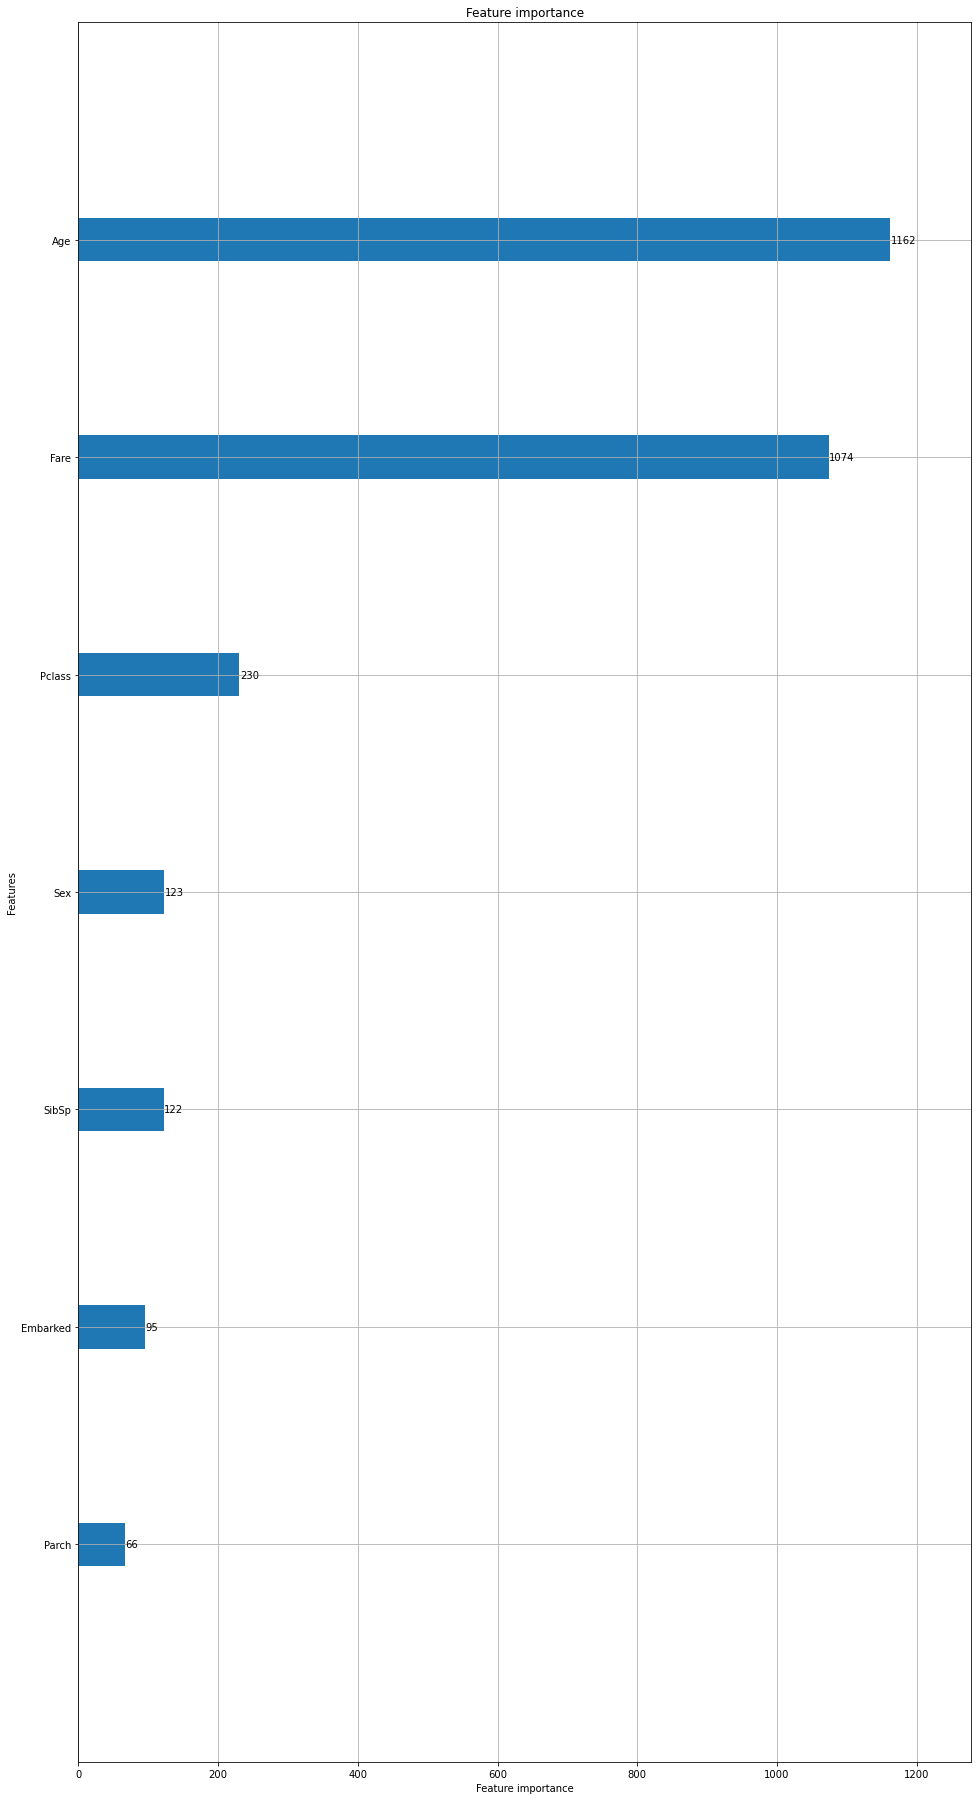

In [42]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))